In [1]:
import pandas as pd

In [2]:
melb = pd.read_csv("melb_data.csv", sep=';')

In [3]:
# Mengecek nilai null
print("=== Jumlah Nilai Null pada Setiap Kolom ===")
print(melb.isnull().sum())

=== Jumlah Nilai Null pada Setiap Kolom ===
Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


In [7]:
# Mengecek nilai kosong pada setiap kolom
print("=== Jumlah Nilai Kosong di Setiap Kolom ===")
print((melb == "").sum())

=== Jumlah Nilai Kosong di Setiap Kolom ===
Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


In [9]:
# Mengecek apakah ada baris duplikat
print("=== Jumlah Baris Duplikat ===")
print(melb.duplicated().sum())

=== Jumlah Baris Duplikat ===
0


In [11]:
# Mengecek missing value per kolom dan total keseluruhan
missing_per_column = melb.isnull().sum()

# Filter hanya kolom yang punya missing value (>0)
missing_columns = missing_per_column[missing_per_column > 0]

# Hasil
print("=== Jumlah Missing Value per Kolom ===")
print(missing_columns)

# Mengecek total keseluruhan missing value
total_missing = melb.isnull().sum().sum()
print(f"\n=== Total Missing Value di Seluruh Dataset: {total_missing} ===")

=== Jumlah Missing Value per Kolom ===
Car              62
YearBuilt      5375
CouncilArea    1369
dtype: int64

=== Total Missing Value di Seluruh Dataset: 6806 ===


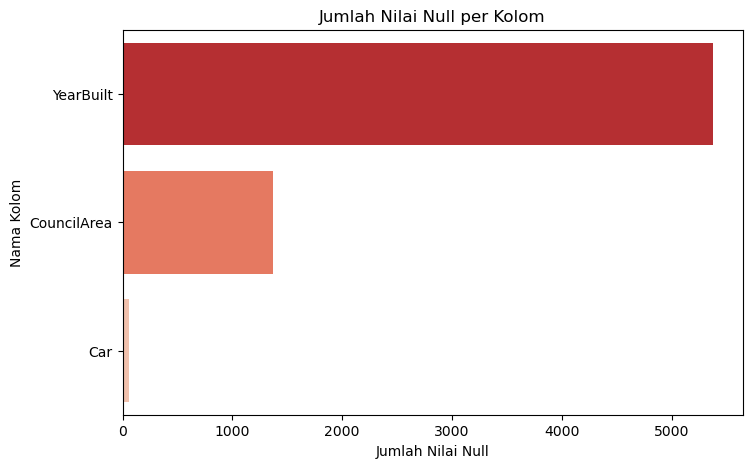

In [13]:
# Visualisasi (Bar Chart) menampilkan jumlah Null per-kolom

import seaborn as sns
import matplotlib.pyplot as plt

missing_counts = melb.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(
    x=missing_counts.values,
    y=missing_counts.index,
    hue=missing_counts.index,  # tambahkan hue agar Seaborn tahu pembeda warnanya
    palette='Reds_r',
    legend=False               # matikan legend agar lebih rapi
)
plt.title("Jumlah Nilai Null per Kolom")
plt.xlabel("Jumlah Nilai Null")
plt.ylabel("Nama Kolom")
plt.show()

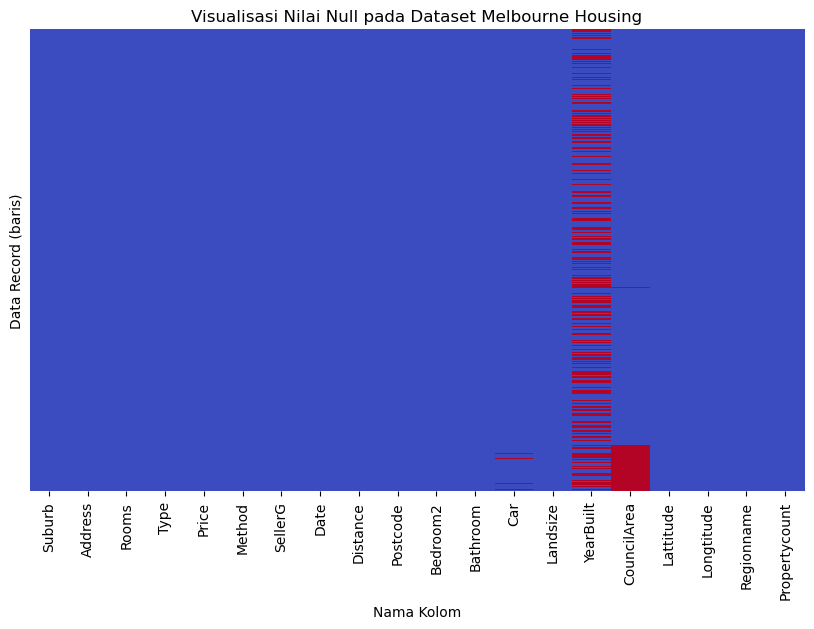

In [14]:
# Visualisasi (Heatmap) untuk menampilkan posisi null per-kolom

plt.figure(figsize=(10,6))
sns.heatmap(melb.isnull(), cbar=False, cmap='coolwarm', yticklabels=False)
plt.title("Visualisasi Nilai Null pada Dataset Melbourne Housing")
plt.xlabel("Nama Kolom")
plt.ylabel("Data Record (baris)")
plt.show()

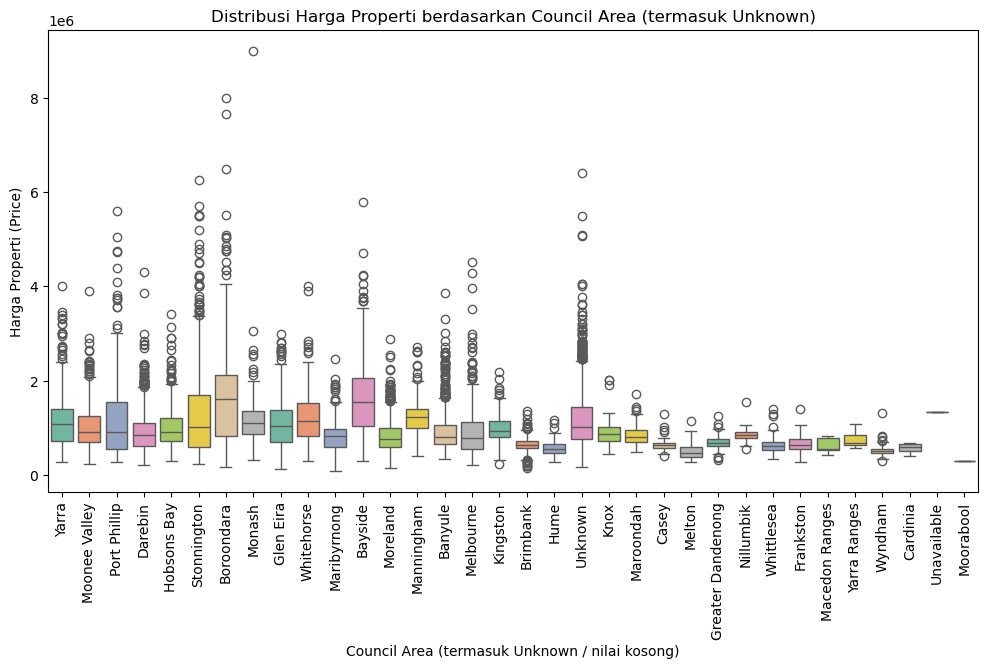

In [15]:
# Visualisasi (Boxplot) dengan Memasukkan Null Sebagai Kategori “Unknown”
# Mengganti nilai null di 'Type' agar tidak diabaikan oleh seaborn

# Mengganti nilai null pada CouncilArea dengan 'Unknown'
melb['CouncilArea_filled'] = melb['CouncilArea'].fillna('Unknown')

# Ukuran figure
plt.figure(figsize=(12, 6))

# Membuat boxplot harga properti berdasarkan CouncilArea
sns.boxplot(
    x='CouncilArea_filled',
    y='Price',
    data=melb,
    hue='CouncilArea_filled',  # ditambahkan agar tidak muncul warning
    palette='Set2',
    legend=False               # nonaktifkan legend agar tidak ganda
)

# Judul dan label
plt.title("Distribusi Harga Properti berdasarkan Council Area (termasuk Unknown)")
plt.xlabel("Council Area (termasuk Unknown / nilai kosong)")
plt.ylabel("Harga Properti (Price)")

# Memutar label X agar terbaca
plt.xticks(rotation=90)
plt.show()

In [16]:
# Mengecek outlier

numeric_cols = melb.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = melb[col].quantile(0.25)
    Q3 = melb[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = melb[(melb[col] < lower) | (melb[col] > upper)]
    
    print(f"{col}: {len(outliers)} outlier dari {len(melb)} data")

Rooms: 682 outlier dari 13580 data
Price: 612 outlier dari 13580 data
Distance: 411 outlier dari 13580 data
Postcode: 208 outlier dari 13580 data
Bedroom2: 655 outlier dari 13580 data
Bathroom: 143 outlier dari 13580 data
Car: 644 outlier dari 13580 data
Landsize: 368 outlier dari 13580 data
YearBuilt: 6 outlier dari 13580 data
Propertycount: 359 outlier dari 13580 data


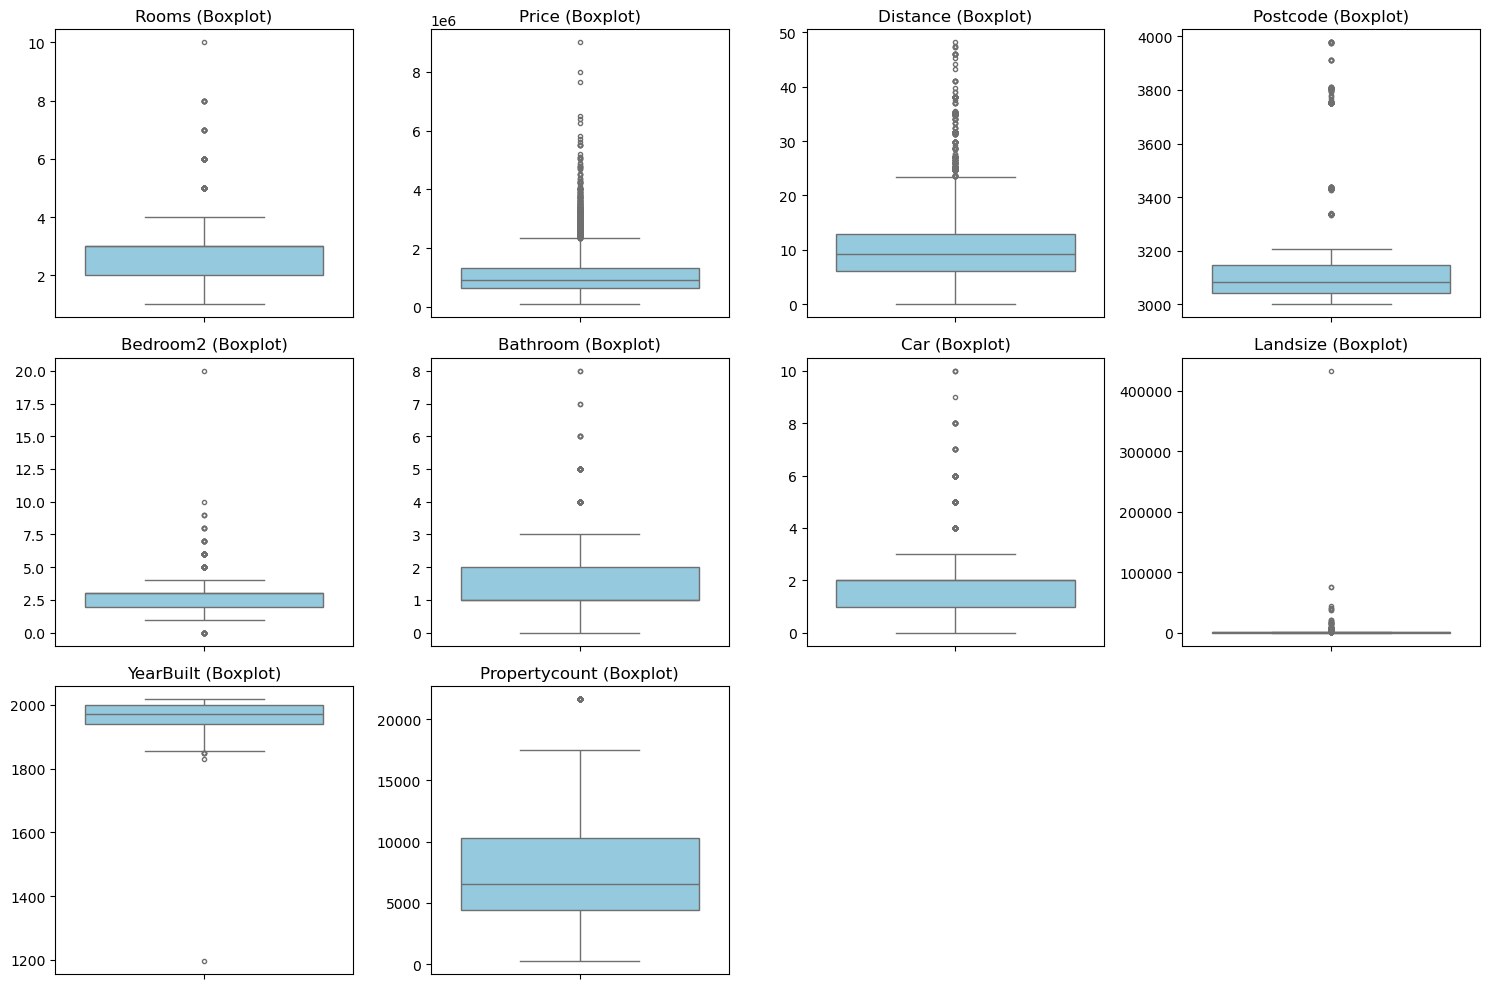

In [17]:
# Visualisasi outlier

# Atur ukuran figure agar cukup besar
plt.figure(figsize=(15, 10))

# Pilih kolom yang ada outlier-nya
cols_with_outliers = ['Rooms', 'Price', 'Distance', 'Postcode', 
                      'Bedroom2', 'Bathroom', 'Car', 'Landsize', 
                      'YearBuilt', 'Propertycount']

# Buat boxplot untuk semua kolom tersebut
for i, col in enumerate(cols_with_outliers, 1):
    plt.subplot(3, 4, i)  # 3 baris, 4 kolom
    sns.boxplot(y=melb[col], color='skyblue', fliersize=3)
    plt.title(f"{col} (Boxplot)")
    plt.ylabel("")  # Supaya tidak menumpuk label

plt.tight_layout()
plt.show()

In [19]:
# Processing

# Handling Missing Values

# a) Kolom numerik (Car dan YearBuilt) diisi dengan median
melb['Car'] = melb['Car'].fillna(melb['Car'].median())
melb['YearBuilt'] = melb['YearBuilt'].fillna(melb['YearBuilt'].median())

# b) Kolom kategorikal (CouncilArea) diisi dengan mode 
melb['CouncilArea'] = melb['CouncilArea'].fillna(melb['CouncilArea'].mode()[0])

# Pengecekan apakah masih ada missing value
print("Jumlah missing value setelah diperbaiki:")
print(melb[['Car', 'YearBuilt', 'CouncilArea']].isnull().sum())

# Menyimpan dataset yang sudah diperbaiki ke csv baru
melb.to_csv("melb_cleaned_missing.csv", index=False)

Jumlah missing value setelah diperbaiki:
Car            0
YearBuilt      0
CouncilArea    0
dtype: int64


In [21]:
# Load dataset hasil perbaikan missing value
melb = pd.read_csv("melb_cleaned_missing.csv")

# Hapus baris dengan YearBuilt tidak realistis (<1800 atau >2025)
melb = melb[(melb['YearBuilt'] >= 1800) & (melb['YearBuilt'] <= 2025)]

In [24]:
# Handling Outliers  (IQR, Winsorization)

# Load dataset hasil cleaning sebelumnya 
melb = pd.read_csv("melb_cleaned_missing.csv")

# Fungsi hapus outlier dengan IQR ===
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower) & (df[column] <= upper)]
    return filtered_df

# Fungsi Winsorization (memotong nilai ekstrem)
def winsorize_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower, upper)
    return df

# Daftar kolom sesuai pendekatan
cols_remove_iqr = ['Rooms', 'Car', 'Bathroom', 'Bedroom2']          # Data diskrit kecil
cols_winsorize = ['Price', 'Distance', 'Landsize', 'Propertycount']  # Data skewed
cols_ignore = ['Postcode']                                           # Kategorikal
col_year = 'YearBuilt'                                               # Logika domain

# Bersihkan outlier 
# Hapus dengan IQR
for col in cols_remove_iqr:
    before = len(melb)
    melb = remove_outliers_iqr(melb, col)
    after = len(melb)
    print(f"{col}: Dihapus {before - after} data outlier")

# Winsorization untuk kolom skewed
for col in cols_winsorize:
    melb = winsorize_iqr(melb, col)
    print(f"{col}: Nilai ekstrem disesuaikan (Winsorization)")

# Perbaiki YearBuilt berdasarkan logika domain
invalid_years = melb[(melb[col_year] < 1800) | (melb[col_year] > 2025)]
print(f"YearBuilt: Ditemukan {len(invalid_years)} data tidak logis")
median_year = melb[(melb[col_year] >= 1800) & (melb[col_year] <= 2025)][col_year].median()
melb.loc[(melb[col_year] < 1800) | (melb[col_year] > 2025), col_year] = median_year
print(f"YearBuilt: Nilai tidak logis diganti dengan median ({median_year})")

# Postcode tidak disentuh
print("Postcode: Tidak dibersihkan karena bersifat kategorikal (kode wilayah)")

# Simpan hasil akhir
melb.to_csv("melb_cleaned_missing_outlier.csv", index=False)
print("Semua kolom telah diperbaiki dan disimpan ke 'melb_cleaned_missing_outlier.csv'")

Rooms: Dihapus 682 data outlier
Car: Dihapus 538 data outlier
Bathroom: Dihapus 42 data outlier
Bedroom2: Dihapus 34 data outlier
Price: Nilai ekstrem disesuaikan (Winsorization)
Distance: Nilai ekstrem disesuaikan (Winsorization)
Landsize: Nilai ekstrem disesuaikan (Winsorization)
Propertycount: Nilai ekstrem disesuaikan (Winsorization)
YearBuilt: Ditemukan 0 data tidak logis
YearBuilt: Nilai tidak logis diganti dengan median (1970.0)
Postcode: Tidak dibersihkan karena bersifat kategorikal (kode wilayah)
Semua kolom telah diperbaiki dan disimpan ke 'melb_cleaned_missing_outlier.csv'


In [25]:
# Mengecek apakah masih ada kolom outlier

melb = pd.read_csv("melb_cleaned_missing_outlier.csv")

def check_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return len(outliers)

# Hanya kolom numerik
num_cols = melb.select_dtypes(include=['int64', 'float64']).columns

print("Jumlah outlier per kolom (setelah perbaikan):")
for col in num_cols:
    out_count = check_outliers_iqr(melb, col)
    print(f"{col}: {out_count} outlier dari {len(melb)} data")

Jumlah outlier per kolom (setelah perbaikan):
Rooms: 0 outlier dari 12284 data
Price: 0 outlier dari 12284 data
Distance: 0 outlier dari 12284 data
Postcode: 174 outlier dari 12284 data
Bedroom2: 0 outlier dari 12284 data
Bathroom: 0 outlier dari 12284 data
Car: 0 outlier dari 12284 data
Landsize: 0 outlier dari 12284 data
YearBuilt: 3642 outlier dari 12284 data
Propertycount: 0 outlier dari 12284 data


In [26]:
# Encoding categorical variables (One-Hot Encoding)

melb = pd.read_csv("melb_cleaned_missing_outlier.csv")

# Memeriksa nilai unik
print("Nilai unik kolom 'Type':", melb['Type'].unique())

# One-Hot Encoding untuk kolom Type
melb_encoded = pd.get_dummies(melb, columns=['Type'], drop_first=True)

print("\nEncoding selesai untuk kolom 'Type'")
print("Jumlah kolom sebelum encoding:", len(melb.columns))
print("Jumlah kolom setelah encoding:", len(melb_encoded.columns))

# Simpan hasil encoding
melb_encoded.to_csv("melb_encoding.csv", index=False)
print("Dataset hasil encoding kolom Type disimpan ke melb_encoding.csv")

Nilai unik kolom 'Type': ['h' 'u' 't']

Encoding selesai untuk kolom 'Type'
Jumlah kolom sebelum encoding: 21
Jumlah kolom setelah encoding: 22
Dataset hasil encoding kolom Type disimpan ke melb_encoding.csv


In [31]:
# Pengecekan hasil encoding

# Load dataset awal dan hasil encoding
melb_original = pd.read_csv("melb_cleaned_missing_outlier.csv")
melb_encoded = pd.read_csv("melb_encoding.csv")

print("Jumlah kolom sebelum encoding:", melb_original.shape[1])
print("Jumlah kolom sesudah encoding:", melb_encoded.shape[1])

# Memastikan kolom kategorikal lama sudah tidak ada
print("\nApakah kolom kategorikal asli masih ada?")
for col in melb_original.select_dtypes(include=['object']).columns:
    print(f"- {col}:", col in melb_encoded.columns)

print("\nKolom baru hasil encoding:")
print(set(melb_encoded.columns) - set(melb.columns))

Jumlah kolom sebelum encoding: 21
Jumlah kolom sesudah encoding: 22

Apakah kolom kategorikal asli masih ada?
- Suburb: True
- Address: True
- Type: False
- Method: True
- SellerG: True
- Date: True
- CouncilArea: True
- Lattitude: True
- Longtitude: True
- Regionname: True
- CouncilArea_filled: True

Kolom baru hasil encoding:
{'Type_t', 'Type_u'}


In [35]:
# Feature scaling (Standardization)

from sklearn.preprocessing import StandardScaler

# Load hasil encoding
melb_encoded = pd.read_csv("melb_encoding.csv")

# Pilih kolom numerik
numeric_cols = melb_encoded.select_dtypes(include=['int64', 'float64']).columns
# Scaling
scaler = StandardScaler()
melb_scaled = melb_encoded.copy()
melb_scaled[numeric_cols] = scaler.fit_transform(melb_encoded[numeric_cols])

print("Scaling selesai. Semua kolom numerik sudah distandarisasi.")
print("\n5 baris gambaran hasil scaling:")
print(melb_scaled[numeric_cols].head())

melb_scaled.to_csv("melb_scaling.csv", index=False)
print("Dataset hasil scaling disimpan ke melb_scaling.csv")

Scaling selesai. Semua kolom numerik sudah distandarisasi.

5 baris gambaran hasil scaling:
      Rooms     Price  Distance  Postcode  Bedroom2  Bathroom       Car  \
0 -0.968933  0.990442 -1.425868 -0.420277 -0.951661 -0.770098 -0.621269   
1 -0.968933  0.078472 -1.425868 -0.420277 -0.951661 -0.770098 -2.009601   
2  0.255339  0.959701 -1.425868 -0.420277  0.278498  0.933465 -2.009601   
3  0.255339 -0.300661 -1.425868 -0.420277  0.278498  0.933465 -0.621269   
4  1.479611  1.236366 -1.425868 -0.420277  0.278498 -0.770098  0.767064   

   Landsize  YearBuilt  Propertycount  
0 -0.664062   0.106694       -0.80747  
1 -0.808355  -2.347922       -0.80747  
2 -0.877365  -2.347922       -0.80747  
3 -1.002837   0.106694       -0.80747  
4 -0.921280   1.649595       -0.80747  
Dataset hasil scaling disimpan ke melb_scaling.csv


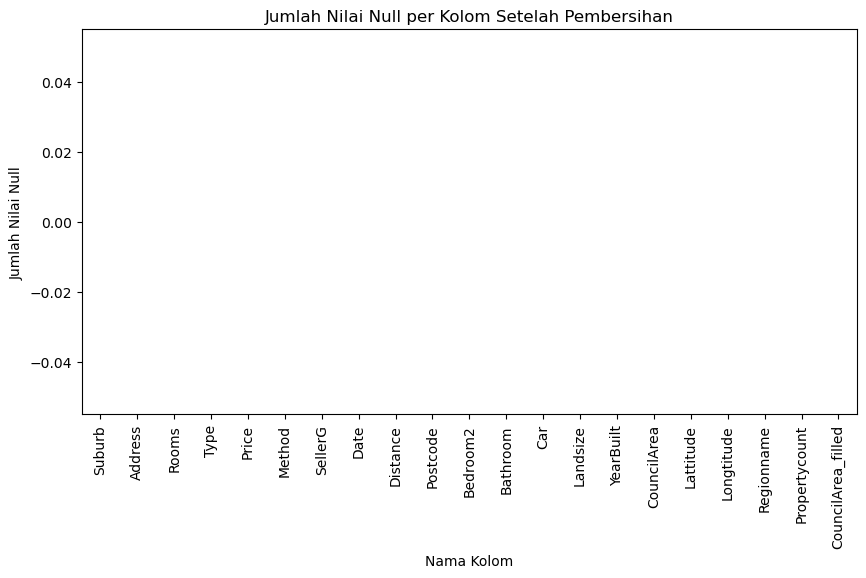

In [50]:
# Visualisasi Data Bersih (Bar Chart)

# Load dataset bersih
melb_clean = pd.read_csv("melb_cleaned_missing_outlier.csv")

# Mengecek kembali nilai null per kolom
missing_counts = melb_clean.isnull().sum()

# Visualisasi bar chart
plt.figure(figsize=(10, 5))
sns.barplot(
    x=missing_counts.index,
    y=missing_counts.values,
    hue=missing_counts.index,  
    palette='Greens',
    legend=False             
)
plt.xticks(rotation=90)
plt.title("Jumlah Nilai Null per Kolom Setelah Pembersihan")
plt.ylabel("Jumlah Nilai Null")
plt.xlabel("Nama Kolom")
plt.show()

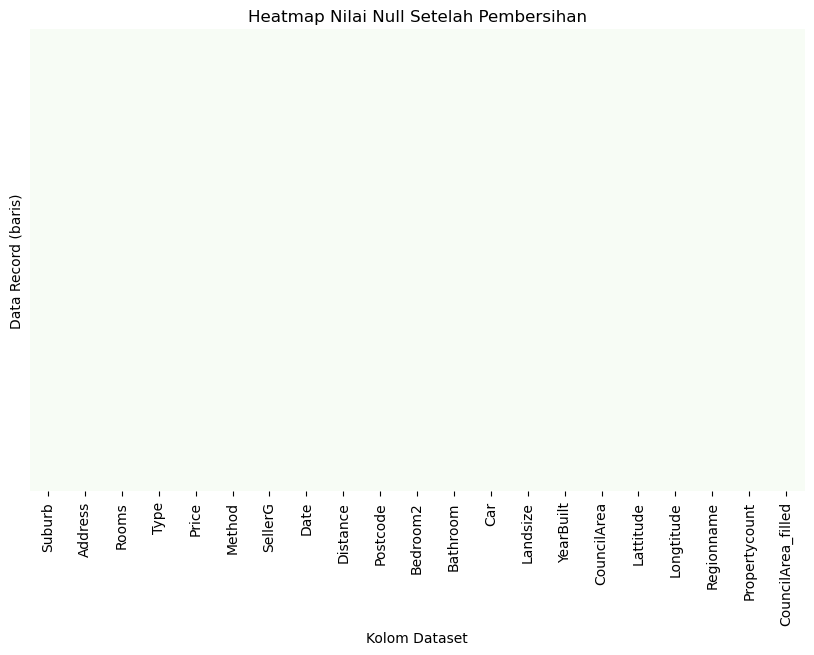

In [52]:
# Visualisasi Data Bersih (Heatmap)

plt.figure(figsize=(10, 6))
sns.heatmap(melb_clean.isnull(), cbar=False, cmap='Greens', yticklabels=False)
plt.title("Heatmap Nilai Null Setelah Pembersihan")
plt.xlabel("Kolom Dataset")
plt.ylabel("Data Record (baris)")
plt.show()

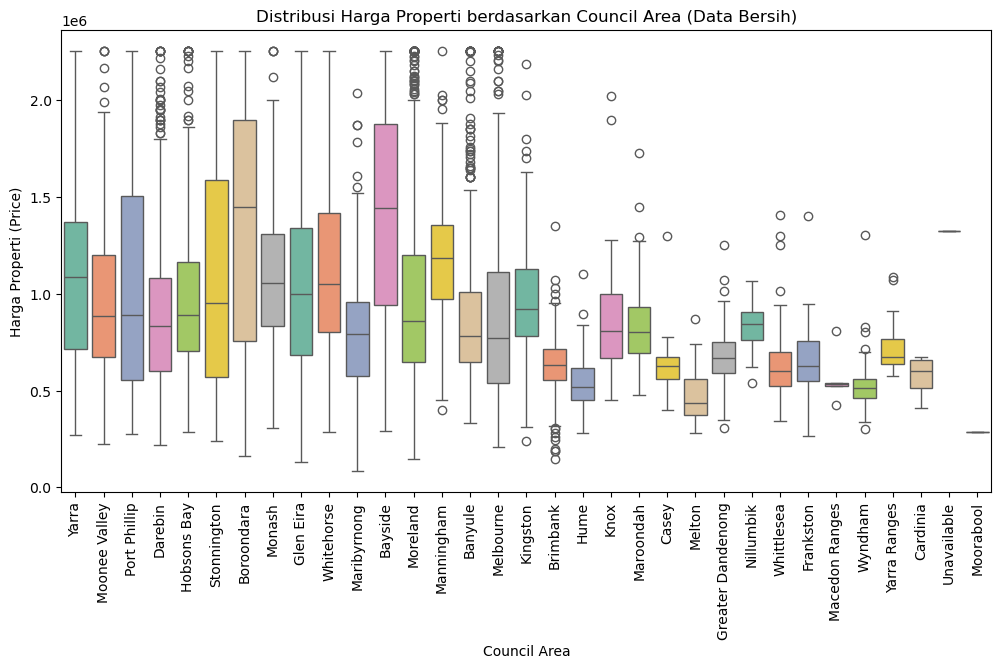

In [60]:
# Visualisasi Data Bersih (Boxplot)

plt.figure(figsize=(12, 6))
sns.boxplot(
    x='CouncilArea',
    y='Price',
    data=melb_clean,
    hue='CouncilArea', 
    palette='Set2',
    legend=False
)

plt.title("Distribusi Harga Properti berdasarkan Council Area (Data Bersih)")
plt.xlabel("Council Area")
plt.ylabel("Harga Properti (Price)")
plt.xticks(rotation=90)
plt.show()

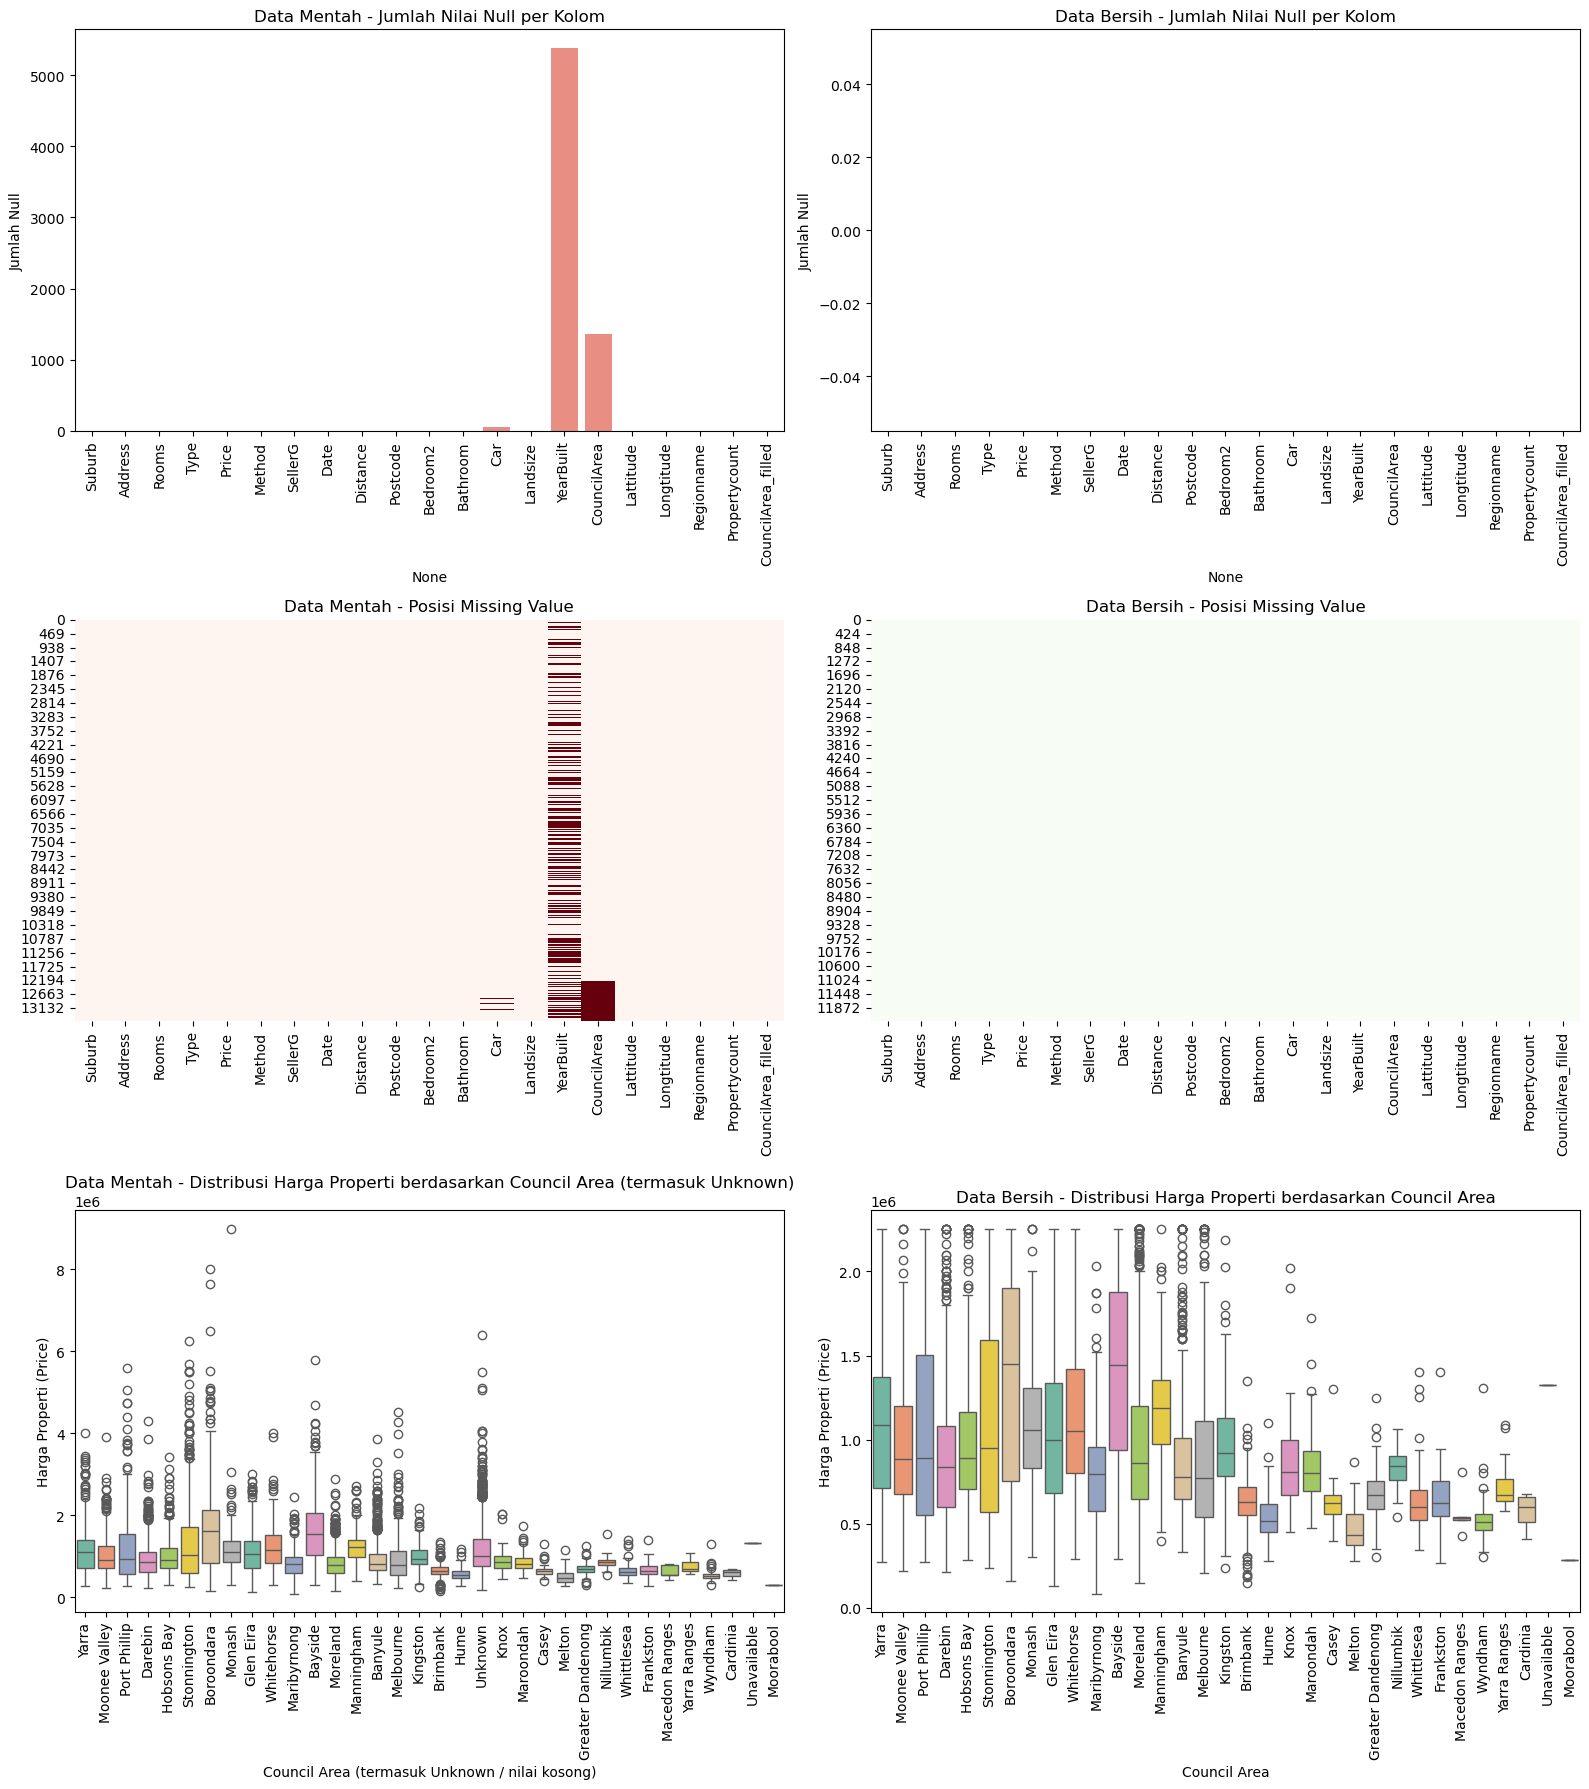

In [78]:
# Perbandingan data mentah dengan data bersih bentuk visualisasi

# Load Dataset 
melb_raw = pd.read_csv("melb_data.csv", sep=';')
melb_clean = pd.read_csv("melb_cleaned_missing_outlier.csv")

# PENYESUAIAN DATA MENTAH
if 'CouncilArea' in melb_raw.columns:
    melb_raw['CouncilArea_filled'] = melb_raw['CouncilArea'].fillna('Unknown')
else:
    melb_raw['CouncilArea_filled'] = 'Unknown'

plt.figure(figsize=(16, 18))

# Bar Chart: Jumlah Nilai Null per Kolom
plt.subplot(3, 2, 1)
missing_raw = melb_raw.isnull().sum()
sns.barplot(x=missing_raw.index, y=missing_raw.values, color="salmon")
plt.title("Data Mentah - Jumlah Nilai Null per Kolom", fontsize=12)
plt.xticks(rotation=90)
plt.ylabel("Jumlah Null")

plt.subplot(3, 2, 2)
missing_clean = melb_clean.isnull().sum()
sns.barplot(x=missing_clean.index, y=missing_clean.values, color="skyblue")
plt.title("Data Bersih - Jumlah Nilai Null per Kolom", fontsize=12)
plt.xticks(rotation=90)
plt.ylabel("Jumlah Null")

# Heatmap: Posisi Missing Value
plt.subplot(3, 2, 3)
sns.heatmap(melb_raw.isnull(), cbar=False, cmap="Reds")
plt.title("Data Mentah - Posisi Missing Value", fontsize=12)

plt.subplot(3, 2, 4)
sns.heatmap(melb_clean.isnull(), cbar=False, cmap="Greens")
plt.title("Data Bersih - Posisi Missing Value", fontsize=12)

# Boxplot: Distribusi Harga Berdasarkan Council Area (Data mentah: null diisi 'Unknown')
plt.subplot(3, 2, 5)
sns.boxplot(
    x='CouncilArea_filled',
    y='Price',
    data=melb_raw,
    hue='CouncilArea_filled',
    palette='Set2',
    legend=False
)
plt.title("Data Mentah - Distribusi Harga Properti berdasarkan Council Area (termasuk Unknown)", fontsize=12)
plt.xlabel("Council Area (termasuk Unknown / nilai kosong)")
plt.ylabel("Harga Properti (Price)")
plt.xticks(rotation=90)

plt.subplot(3, 2, 6)
sns.boxplot(
    x='CouncilArea',
    y='Price',
    data=melb_clean,
    hue='CouncilArea',
    palette='Set2',
    legend=False
)
plt.title("Data Bersih - Distribusi Harga Properti berdasarkan Council Area", fontsize=12)
plt.xlabel("Council Area")
plt.ylabel("Harga Properti (Price)")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

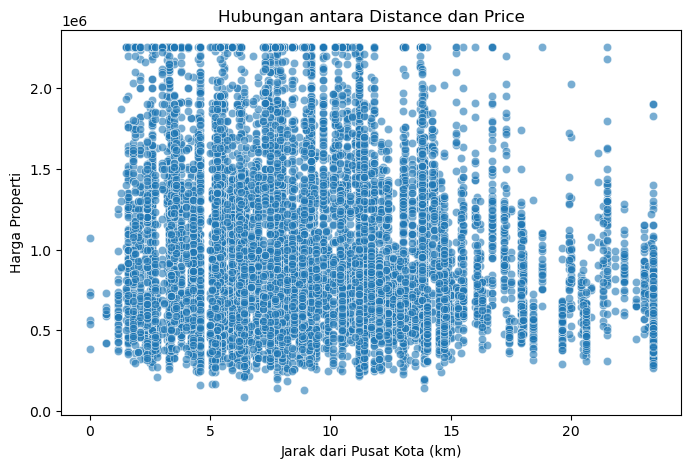

In [82]:
# Visualisasi Data Bersih (Scatter Plot)
# Hubungan Distance dan Price

# Load data bersih
melb = pd.read_csv("melb_cleaned_missing_outlier.csv")

plt.figure(figsize=(8,5))
sns.scatterplot(x='Distance', y='Price', data=melb, alpha=0.6)
plt.title("Hubungan antara Distance dan Price")
plt.xlabel("Jarak dari Pusat Kota (km)")
plt.ylabel("Harga Properti")
plt.show()

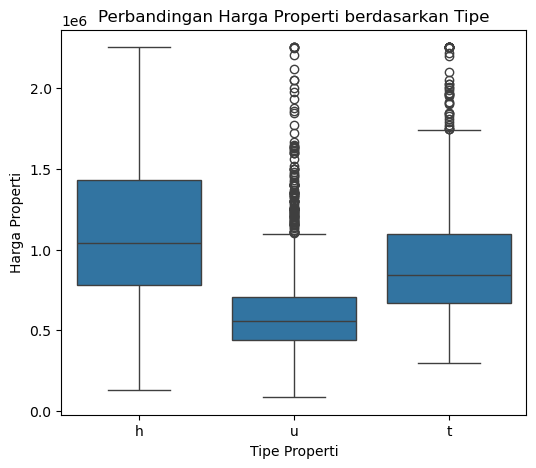

In [84]:
# Visualisasi Data Bersih (Box Plot)
# Perbandingan Harga antara Jenis Properti

plt.figure(figsize=(6,5))
sns.boxplot(x='Type', y='Price', data=melb)
plt.title("Perbandingan Harga Properti berdasarkan Tipe")
plt.xlabel("Tipe Properti")
plt.ylabel("Harga Properti")
plt.show()

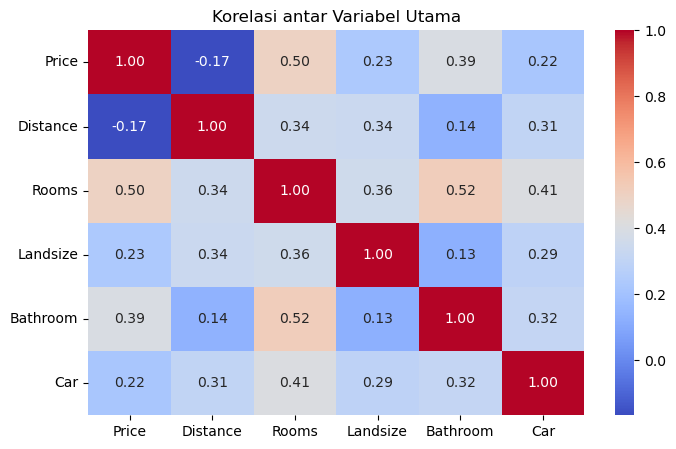

In [90]:
# Visualisasi Data Bersih (Heatmap)
# Korelasi antar Variabel Utama

plt.figure(figsize=(8,5))
sns.heatmap(
    melb[['Price', 'Distance', 'Rooms', 'Landsize', 'Bathroom', 'Car']].corr(),
    annot=True, cmap='coolwarm', fmt=".2f"
)
plt.title("Korelasi antar Variabel Utama")
plt.show()

Jumlah fitur numerik sebelum PCA: 10


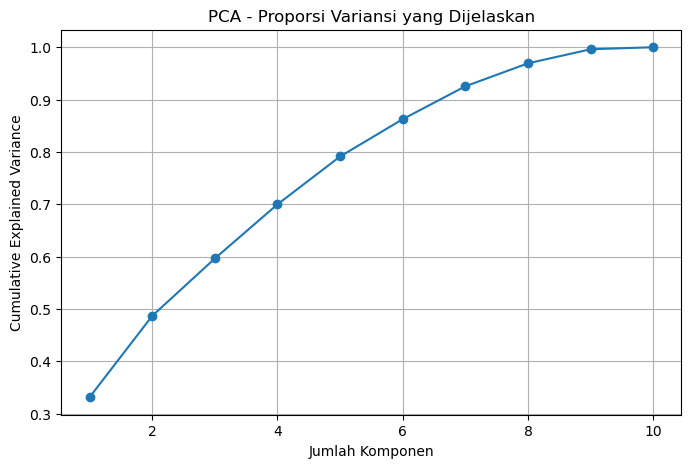

Jumlah komponen yang menjelaskan ≥95% variansi: 8
PCA selesai. Hasil disimpan ke melb_pca.csv


In [80]:
# Feature selection/reduction (PCA)

import numpy as np
from sklearn.decomposition import PCA

# Load dataset hasil scaling 
melb_scaled = pd.read_csv("melb_scaling.csv")

# Memilih hanya kolom numerik untuk PCA 
numeric_cols = melb_scaled.select_dtypes(include=['float64', 'int64']).columns
X = melb_scaled[numeric_cols]

print("Jumlah fitur numerik sebelum PCA:", X.shape[1])

# Melakukan PCA 
pca = PCA(n_components=None)  # Mengambil semua komponen terlebih dahulu
pca.fit(X)

# Menghitung proporsi varian yang dijelaskan oleh tiap komponen 
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot hasilnya 
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Proporsi Variansi yang Dijelaskan')
plt.grid(True)
plt.show()

# Menentukan jumlah komponen optimal (contohnya yang menjelaskan 95% variansi) 
n_components_95 = np.argmax(explained_variance >= 0.95) + 1
print(f"Jumlah komponen yang menjelaskan ≥95% variansi: {n_components_95}")

# Transformasi data ke dimensi yang lebih sedikit 
pca_final = PCA(n_components=n_components_95)
X_pca = pca_final.fit_transform(X)

# Simpan hasil reduksi ke CSV baru
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(n_components_95)])
pca_df.to_csv("melb_pca.csv", index=False)

print("PCA selesai. Hasil disimpan ke melb_pca.csv")

In [38]:
# Uji parametrik (Pearson Correlation)
# Hubungan Distance dan Price

from scipy.stats import pearsonr

# Load dataset hasil scaling
melb_scaled = pd.read_csv("melb_scaling.csv")

# Mengambil dua variabel numerik
x = melb_scaled["Distance"]
y = melb_scaled["Price"]

# Melakukan uji korelasi Pearson
corr, p_value = pearsonr(x, y)

# Menghitung Confidence Interval (95%) untuk korelasi
n = len(x)
z = np.arctanh(corr)  # Fisher z-transformation
se = 1 / np.sqrt(n - 3)
z_conf = 1.96 * se  # 95% confidence interval
ci_low, ci_high = np.tanh([z - z_conf, z + z_conf])

# Menampilkan hasil
print("=== Uji Parametrik: Pearson Correlation ===")
print("Mengukur hubungan antara Distance dan Price\n")
print(f"Koefisien Korelasi (r) : {corr:.4f}")
print(f"p-value                : {p_value:.5f}")
print(f"95% Confidence Interval: ({ci_low:.4f}, {ci_high:.4f})")

# Interpretasi
if abs(corr) < 0.1:
    interpret = "hubungan sangat lemah"
elif abs(corr) < 0.3:
    interpret = "hubungan lemah"
elif abs(corr) < 0.5:
    interpret = "hubungan sedang"
else:
    interpret = "hubungan kuat"

arah = "positif" if corr > 0 else "negatif"
print(f"\nInterpretasi: Terdapat hubungan {interpret} dan {arah} antara Distance dan Price.")

alpha = 0.05
if p_value < alpha:
    print("Hubungan ini signifikan secara statistik (p < 0.05).")
else:
    print("Hubungan ini tidak signifikan secara statistik (p ≥ 0.05).")

=== Uji Parametrik: Pearson Correlation ===
Mengukur hubungan antara Distance dan Price

Koefisien Korelasi (r) : -0.1666
p-value                : 0.00000
95% Confidence Interval: (-0.1837, -0.1493)

Interpretasi: Terdapat hubungan hubungan lemah dan negatif antara Distance dan Price.
Hubungan ini signifikan secara statistik (p < 0.05).


In [41]:
# Uji parametrik (t-test)
# Perbandingan Price antara Type h (house) dan u (unit)

from scipy import stats

# Load dataset hasil cleaning 
melb = pd.read_csv("melb_cleaned_missing_outlier.csv")

# Mengambil dua kelompok harga berdasarkan jenis properti
house = melb[melb["Type"] == "h"]["Price"]
unit = melb[melb["Type"] == "u"]["Price"]

# Independent t-test untuk melihat rata-rata harga House dan Unit apakah berbeda signifikan
t_stat, p_val = stats.ttest_ind(house, unit, equal_var=False)

# Hasil uji
print("=== Uji Parametrik: Independent t-test ===")
print("Membandingkan rata-rata harga antara House dan Unit\n")
print(f"t-statistic : {t_stat:.3f}")
print(f"p-value     : {p_val:.5f}")

# Interpretasi hasil, Jika p-value < 0.05 → perbedaan signifikan
alpha = 0.05
if p_val < alpha:
    print("\nKesimpulan: Ada perbedaan signifikan antara harga House dan Unit (p < 0.05).")
else:
    print("\nKesimpulan: Tidak ada perbedaan signifikan antara harga House dan Unit (p ≥ 0.05).")

=== Uji Parametrik: Independent t-test ===
Membandingkan rata-rata harga antara House dan Unit

t-statistic : 77.504
p-value     : 0.00000

Kesimpulan: Ada perbedaan signifikan antara harga House dan Unit (p < 0.05).


In [43]:
# Uji Non-Parametrik (Mann-Whitney U)
# Melihat apakah Price berbeda secara signifikan antara h (house) dan u (unit)
# Alternatif non-parametrik dari t-test

# Load dataset hasil cleaning
melb = pd.read_csv("melb_cleaned_missing_outlier.csv")

# Mengambil dua kelompok harga berdasarkan jenis properti
house = melb[melb["Type"] == "h"]["Price"]
unit = melb[melb["Type"] == "u"]["Price"]

# Melakukan Mann-Whitney U Test
u_stat, p_val = stats.mannwhitneyu(house, unit, alternative='two-sided')

# Menghitung effect size (r)
n1, n2 = len(house), len(unit)
z = stats.norm.ppf(p_val / 2) if p_val > 0 else -10  # pendekatan z-score
r = abs(z) / np.sqrt(n1 + n2)

# Menampilkan hasil
print("=== Uji Non-Parametrik 1: Mann-Whitney U Test ===")
print("Menguji perbedaan distribusi harga antara House dan Unit\n")
print(f"U-statistic : {u_stat:.3f}")
print(f"p-value     : {p_val:.5f}")
print(f"Effect Size (r) : {r:.3f}")

# Interpretasi
alpha = 0.05
if p_val < alpha:
    print("\nKesimpulan: Ada perbedaan signifikan antara distribusi harga House dan Unit (p < 0.05).")
else:
    print("\nKesimpulan: Tidak ada perbedaan signifikan antara distribusi harga House dan Unit (p ≥ 0.05).")

if r < 0.1:
    interpret = "Efek sangat kecil"
elif r < 0.3:
    interpret = "Efek kecil"
elif r < 0.5:
    interpret = "Efek sedang"
else:
    interpret = "Efek besar"
print(f"Interpretasi Effect Size: {interpret}")

=== Uji Non-Parametrik 1: Mann-Whitney U Test ===
Menguji perbedaan distribusi harga antara House dan Unit

U-statistic : 21316249.000
p-value     : 0.00000
Effect Size (r) : 0.095

Kesimpulan: Ada perbedaan signifikan antara distribusi harga House dan Unit (p < 0.05).
Interpretasi Effect Size: Efek sangat kecil


In [45]:
# Uji Non-Parametrik (Spearman Rank Correlation)
# Hubungan Distance dan Price
# Alternatif Uji parametrik dari Pearson Correlation

# Load dataset hasil cleaning
melb = pd.read_csv("melb_cleaned_missing_outlier.csv")

# Mengambil dua kolom numerik yang akan diuji
x = melb["Distance"]
y = melb["Price"]

# Melakukan uji Spearman Rank Correlation
rho, p_val = stats.spearmanr(x, y)

# Menampilkan hasil utama
print("\n=== Uji Non-Parametrik: Spearman Rank Correlation ===")
print("Mengukur hubungan antara Distance (jarak) dan Price (harga rumah)\n")
print(f"Koefisien Korelasi (rho) : {rho:.3f}")
print(f"p-value                  : {p_val:.5f}")

# Interpretasi signifikansi
alpha = 0.05
if p_val < alpha:
    signif_text = "Terdapat hubungan signifikan (p < 0.05)"
else:
    signif_text = "Tidak ada hubungan signifikan (p ≥ 0.05)"

# Interpretasi kekuatan korelasi (effect size)
if abs(rho) < 0.1:
    strength = "sangat lemah"
elif abs(rho) < 0.3:
    strength = "lemah"
elif abs(rho) < 0.5:
    strength = "sedang"
elif abs(rho) < 0.7:
    strength = "kuat"
else:
    strength = "sangat kuat"

# Interpretasi arah korelasi
if rho > 0:
    direction = "positif (semakin jauh, harga semakin tinggi)"
elif rho < 0:
    direction = "negatif (semakin jauh, harga semakin rendah)"
else:
    direction = "tidak ada arah hubungan yang jelas"

# Mencetak interpretasi akhir
print("\n--- Interpretasi ---")
print(f"Hubungan antara Distance dan Price bersifat {direction}.")
print(f"Kekuatan hubungan tergolong {strength}.")
print(f"{signif_text}.")
print("\nKesimpulan: Nilai rho dapat dianggap sebagai ukuran *effect size* yang menunjukkan seberapa kuat hubungan monotonic antara jarak dan harga properti.")


=== Uji Non-Parametrik: Spearman Rank Correlation ===
Mengukur hubungan antara Distance (jarak) dan Price (harga rumah)

Koefisien Korelasi (rho) : -0.132
p-value                  : 0.00000

--- Interpretasi ---
Hubungan antara Distance dan Price bersifat negatif (semakin jauh, harga semakin rendah).
Kekuatan hubungan tergolong lemah.
Terdapat hubungan signifikan (p < 0.05).

Kesimpulan: Nilai rho dapat dianggap sebagai ukuran *effect size* yang menunjukkan seberapa kuat hubungan monotonic antara jarak dan harga properti.
